## **Question 2**

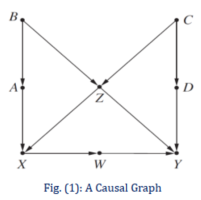

Now, consider the following causal graph in Fig. (1).
1. Write code using causalgraphicalmodel library in Python to draw this causal graph in Python. [0.5 points]

2. Write code to find all backdoor paths from X to Y. [0.5 points]

3. Write code to list all of the sets of variables that satisfy the backdoor criterion to determine the causal
effect of X on Y. [0.5 points]

4. [Not code, do it in paper and write your findings as a text block on Jupyter notebook] List all of the
minimal sets of variables that satisfy the backdoor criterion to determine the causal effect of X on Y (i.e.,
any set of variables such that, if you removed any one of the variables from the set, it would no longer
meet the criterion). [0.5 points]

5. You are given the data set associated with the causal graph presented in Fig. (1). The data set is provided
to you as a csv file, "DatasetProblem2.csv". Write code to load and take a look at the data. [0.5 points]
Example code:

6. Let’s assume that X and Y have a linear relationship. Now, using the data and causal effect estimation
code, write code to find the causal effect of X on Y for the following adjustment sets. [0.5 point]
a. Empty adjustment set, {}
b. {Z}
c. {Z, A}
d. {Z, B}
e. {Z, C}
f. {Z, D}
g. {A, B, C, D}
h. {Z, A, B, C, D}

7. Explain the similarities and differences in results that found in question 6(a)-(h) based on different
adjustment sets. Hint: you can use your answer to question 2, 3 and 4 to explain it. [0.5 points]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
!pip install graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

!pip install causalgraphicalmodels
from causalgraphicalmodels import CausalGraphicalModel
from causalgraphicalmodels.examples import fork, chain, collider

Q2) 1.

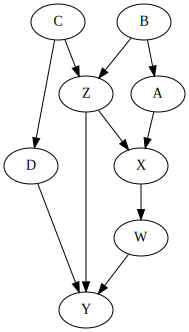

In [ ]:
graph= CausalGraphicalModel(
    nodes = ['B','A','C','D','Z','X','W','Y'],
    edges = [('C','Z'),('C','D'),('D','Y'),('B','A'),('B','Z'),('A','X'),('Z','X'),('X','W'),('Z','Y'),('W','Y')]
)
graph.draw()

Q2) 2.

In [ ]:
graph.get_all_backdoor_paths("X", "Y")

[['X', 'A', 'B', 'Z', 'C', 'D', 'Y'],
 ['X', 'A', 'B', 'Z', 'Y'],
 ['X', 'Z', 'C', 'D', 'Y'],
 ['X', 'Z', 'Y']]

Q2) 3.

In [ ]:
graph.get_all_backdoor_adjustment_sets("X", "Y")

frozenset({frozenset({'D', 'Z'}),
           frozenset({'A', 'D', 'Z'}),
           frozenset({'C', 'D', 'Z'}),
           frozenset({'B', 'D', 'Z'}),
           frozenset({'B', 'C', 'D', 'Z'}),
           frozenset({'A', 'Z'}),
           frozenset({'C', 'Z'}),
           frozenset({'A', 'C', 'Z'}),
           frozenset({'B', 'Z'}),
           frozenset({'B', 'C', 'Z'}),
           frozenset({'A', 'B', 'Z'}),
           frozenset({'A', 'B', 'C', 'Z'}),
           frozenset({'A', 'B', 'D', 'Z'}),
           frozenset({'A', 'C', 'D', 'Z'}),
           frozenset({'A', 'B', 'C', 'D', 'Z'})})

Q2) 4.

*   {A,Z}
*   {D,Z}
*   {Z,C}
*   {Z,B}





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q2) 5.

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ML/DatasetProblem2.csv')

In [ ]:
data.head()

,A,B,C,D,W,x,y,Z
0,2.602301,2.164052,0.497883,0.520597,0.455927,1.703984,-1.482663,-0.459168
1,0.839685,0.800157,-0.133231,0.264815,1.588338,2.700699,3.653630,1.032344
2,2.265791,1.378738,2.433600,1.234205,1.163482,1.579211,3.269566,4.030934
3,3.201152,2.640893,0.890649,0.402494,2.631039,2.132182,3.104638,1.219381
4,-0.123011,2.267558,0.522190,0.810416,-1.173674,-1.910518,-0.222856,0.732709


In [ ]:
data.shape

(10000, 8)

In [ ]:
data.describe()

,A,B,C,D,W,x,y,Z
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.394982,0.381566,0.710988,0.211290,0.512583,0.584010,0.973753,0.755718
std,1.440280,0.987606,0.993104,1.056776,1.739730,1.608777,2.216820,1.364684
min,-5.215048,-3.340101,-3.746632,-3.940893,-6.457293,-5.260569,-7.214188,-4.142516
25%,-0.570654,-0.289707,0.054712,-0.485442,-0.668365,-0.503971,-0.470169,-0.159272
50%,0.389879,0.372927,0.704078,0.228657,0.522088,0.561199,0.955625,0.762106
75%,1.359496,1.046089,1.376403,0.918636,1.716961,1.685734,2.479327,1.680683
max,5.579001,4.201660,4.298310,4.340303,7.121039,6.725668,10.420179,6.598771


Q2) 6.

In [ ]:
def causalEffectEstimation(data, XColumns, XColumnsLabel, zColumns, yColumns, model = RandomForestClassifier(n_estimators=10)):
   
    # separate data into treatment, adjustment set, outcome
    # treatment, X
    trainX = data[XColumns]
    # adjustment set, Z
    trainZ = data[zColumns]
    # outcome, Y
    trainY = data[yColumns]
    
    # merge treatment, X and adjustment, Z
    trainXZ = pd.concat([trainX, trainZ], axis = 1)

    # we fit a ML model 
    model.fit(trainXZ, trainY)

    ## Causal effect estimation of X on y

    # No treatment: Set X = 0. 
    testXZ = trainXZ.copy()
    testXZ[XColumns] = 0
    # With treatment: Set X = 1.   
    testXZTreatment = trainXZ.copy()
    testXZTreatment[XColumns] = 1

    # Estimate outcome without treatment    
    Estimate = np.mean(model.predict(testXZ))
    # Estimate outcome without treatment   
    treatmentEstimate = np.mean(model.predict(testXZTreatment))
    
    # Estimate average treatment effect
    causalEffect = treatmentEstimate - Estimate

    # Print results:    
    print('Causal effect:' + str(causalEffect))

a. Empty adjustment set, {}

In [ ]:
# No adjustment
XColumns = ['x']
zColumns = []
yColumns = ['y']
causalEffectEstimation(data, XColumns, 'x', zColumns, yColumns, LinearRegression())

Causal effect:0.9422406531626906


b. Adjustment set {Z}

In [ ]:
# adjustment Z
XColumns = ['x']
zColumns = ['Z']
yColumns = ['y']
causalEffectEstimation(data, XColumns, 'x', zColumns, yColumns, LinearRegression())

Causal effect:0.6417030597911736


c. Adjustment set {Z,A}

In [ ]:
XColumns = ['x']
zColumns = ['Z','A']
yColumns = ['y']
causalEffectEstimation(data, XColumns, 'x', zColumns, yColumns, LinearRegression())

Causal effect:0.6470450790826662


d. Adjustment set {Z,B}

In [ ]:
XColumns = ['x']
zColumns = ['Z','B']
yColumns = ['y']
causalEffectEstimation(data, XColumns, 'x', zColumns, yColumns, LinearRegression())

Causal effect:0.6578986305288841


e. Adjustment set {Z,C}

In [ ]:
XColumns = ['x']
zColumns = ['Z','C']
yColumns = ['y']
causalEffectEstimation(data, XColumns, 'x', zColumns, yColumns, LinearRegression())

Causal effect:0.6582357825455858


f. Adjustment set {Z,D}

In [ ]:
XColumns = ['x']
zColumns = ['Z','D']
yColumns = ['y']
causalEffectEstimation(data, XColumns, 'x', zColumns, yColumns, LinearRegression())

Causal effect:0.6568522573940178


g. Adjustment set {A,B,C,D}

In [ ]:
XColumns = ['x']
zColumns = ['A','B','C','D']
yColumns = ['y']
causalEffectEstimation(data, XColumns, 'x', zColumns, yColumns, LinearRegression())

Causal effect:0.859825977806574


h. Adjustment set {Z,A,B,C,D}

In [ ]:
XColumns = ['x']
zColumns = ['Z','A','B','C','D']
yColumns = ['y']
causalEffectEstimation(data, XColumns, 'x', zColumns, yColumns, LinearRegression())

Causal effect:0.6516705994346009


Q2) 7.

Answers 'a' with an empty adjustment set and 'g' with {A,B,C,D} adjustment set did not block all the backdoor path, hence, they have almost similar causal effect estimation. 

Answers 'c,d,e,f and h' block all the backdoor path, fullfilling the backdoor criterion.

Answer 'b' {Z}- is a collider, with the least causal effect estimation did not block the backdoor path. Conditioning on Z will unblock the paths and will violate backdoor criterion




---



---



---



---

